In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, GRU, LSTM, Bidirectional, SpatialDropout1D, TextVectorization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# def remove_english_stopwords(text):
#    stop_words = set(stopwords.words('english'))
#    word_tokens = word_tokenize(text)
#    filtered_text = [word for word in word_tokens if not word in stop_words]
#    return ' '.join(filtered_text)

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def preprocess(text):
    text = remove_nonaplhanumeric(text) 
    text = remove_unnecessary_char(text) 
#     text = remove_english_stopwords(text) 
    return text

In [4]:
train_data = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv',index_col='id')
train_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train_data['comment_text'] = train_data['comment_text'].apply(preprocess)
train_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
000103f0d9cfb60f,D aww He matches this background colour I m se...,0,0,0,0,0,0
000113f07ec002fd,Hey man I m really not trying to edit war It s...,0,0,0,0,0,0
0001b41b1c6bb37e,More I can t make any real suggestions on imp...,0,0,0,0,0,0
0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


In [6]:
train_data['comment_length'] = train_data['comment_text'].apply(lambda row: len(row))
train_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
id,,,,,,,,
0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,261
000103f0d9cfb60f,D aww He matches this background colour I m se...,0,0,0,0,0,0,103
000113f07ec002fd,Hey man I m really not trying to edit war It s...,0,0,0,0,0,0,230
0001b41b1c6bb37e,More I can t make any real suggestions on imp...,0,0,0,0,0,0,603
0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0,64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

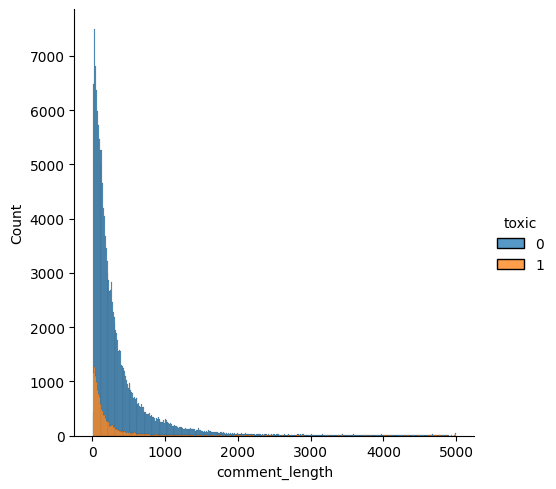

In [7]:
import seaborn as sns
sns.displot(
    data=train_data, 
    x="comment_length", 
    hue='toxic',
    multiple="stack",
)

In [8]:
toxic_data = train_data[train_data['toxic'] == 1]
toxic_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
id,,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
0005c987bdfc9d4b,Hey what is it talk What is it an exclusive gr...,1,0,0,0,0,0,296
0007e25b2121310b,Bye Don t look come or think of comming back T...,1,0,0,0,0,0,52
001810bf8c45bf5f,You are gay or antisemmitian Archangel WHite T...,1,0,1,0,1,1,615
00190820581d90ce,FUCK YOUR FILTHY MOTHER IN THE ASS DRY,1,0,1,0,1,0,39


In [9]:
print(
    'max', toxic_data['comment_length'].max(),
    'min', toxic_data['comment_length'].min(),
    'mean', toxic_data['comment_length'].mean(),
    'median', toxic_data['comment_length'].median(),
    '75%', toxic_data['comment_length'].quantile(0.75),
)

max 5000 min 8 mean 280.898260755852 median 118.0 75% 260.0


In [10]:
max_comment_len = 300

In [11]:
test_data = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv',index_col='id')
test_data.head()

,comment_text
id,
00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
0000247867823ef7,== From RfC == \n\n The title is fine as it is...
00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
00017563c3f7919a,":If you have a look back at the source, the in..."
00017695ad8997eb,I don't anonymously edit articles at all.


In [12]:
test_labels_data = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv',index_col='id')
test_labels_data.head()


,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,-1,-1,-1,-1,-1,-1
0000247867823ef7,-1,-1,-1,-1,-1,-1
00013b17ad220c46,-1,-1,-1,-1,-1,-1
00017563c3f7919a,-1,-1,-1,-1,-1,-1
00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [13]:
test_data = test_data.join(test_labels_data)
test_data = test_data[test_data['toxic'] != -1]
test_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [14]:
num_words = 10000
encoder = TextVectorization(max_tokens=num_words)
encoder.adapt(train_data['comment_text'].values)

from tensorflow.keras.layers import BatchNormalization

model_gru = Sequential([
    encoder,
    Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        mask_zero=True,
        input_length=max_comment_len,
    ),
    SpatialDropout1D(0.5),
    Bidirectional(GRU(20, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(GRU(20)),
    Dense(6, activation='sigmoid'),
])


In [15]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [16]:
model_gru_save_path = '/kaggle/working/toxic_model_gru'
checkpoint_callback_gru = ModelCheckpoint(
    model_gru_save_path, 
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    save_format='tf',
)

In [17]:
!rm -r /kaggle/working/toxic_model_gru

rm: cannot remove '/kaggle/working/toxic_model_gru': No such file or directory


In [18]:
x_train1 = train_data['comment_text'].values
y_train1 = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [19]:
from sklearn.model_selection import train_test_split 
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,train_size=0.8,shuffle=True,random_state=42)

In [20]:
x_train[:2]

array(['Grandma Terri Should Burn in Trash Grandma Terri is trash I hate Grandma Terri F K her to HELL 71 74 76 40',
       ' 9 May 2009 UTC It would be easiest if you were to admit to being a member of the involved Portuguese Lodge and then there would be no requirement to acknowledge whether you had a previous account Carlos Botelho did not have a good record or not and I would then remove the sockpuppet template as irrelevant WP COI permits people to edit those articles such as MSJapan does but just means you have to be more careful in ensuring that references back your edits and that NPOV is upheld 20 29'],
      dtype=object)

In [21]:
y_train[:2]

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [22]:
history_gru = model_gru.fit(
    x_train, 
    y_train, 
    epochs=5, # 15
    batch_size=512,
    validation_data=(x_val,y_val),
    callbacks=[checkpoint_callback_gru],
)

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.8188 - auc: 0.8938
Epoch 1: val_accuracy improved from -inf to 0.75128, saving model to /kaggle/working/toxic_model_gru
250/250 [==============================] - 146s 505ms/step - loss: 0.1233 - accuracy: 0.8188 - auc: 0.8938 - val_loss: 0.0780 - val_accuracy: 0.7513 - val_auc: 0.9728
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.9670 - auc: 0.9806
Epoch 2: val_accuracy improved from 0.75128 to 0.99355, saving model to /kaggle/working/toxic_model_gru
250/250 [==============================] - 111s 446ms/step - loss: 0.0533 - accuracy: 0.9670 - auc: 0.9806 - val_loss: 0.0520 - val_accuracy: 0.9935 - val_auc: 0.9830
Epoch 3/5
250/250 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9851 - auc: 0.9845
Epoch 3: val_accuracy did not improve from 0.99355
250/250 [==============================] - 68s 272ms/step - loss: 0.0468 - accuracy

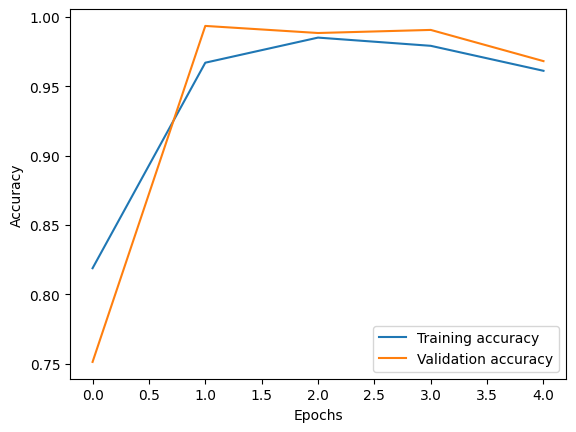

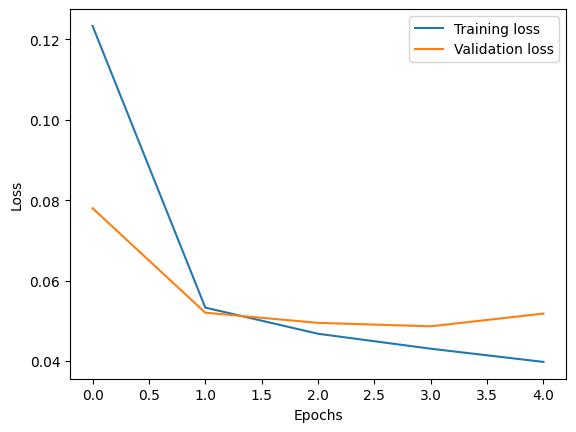

In [23]:
plt.plot(history_gru.history['accuracy'], 
         label='Training accuracy')
plt.plot(history_gru.history['val_accuracy'], 
         label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history_gru.history['loss'], 
         label='Training loss')
plt.plot(history_gru.history['val_loss'], 
         label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
x_test = test_data['comment_text'].values
y_test = test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [25]:
model_gru.evaluate(x_test, y_test, verbose=1)

2000/2000 [==============================] - 50s 25ms/step - loss: 0.0760 - accuracy: 0.9726 - auc: 0.9675


[0.07604211568832397, 0.9726312160491943, 0.9675103425979614]

In [26]:
saved_model = load_model(model_gru_save_path)

In [27]:
test_data[test_data['toxic']==1][:5]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",1,0,0,0,0,0
0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,1,0,1,0,1,1
0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",1,0,1,0,1,0
001d739c97bc2ae4,How dare you vandalize that page about the HMS...,1,0,0,0,0,0
001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",1,0,1,0,1,0


In [28]:
test_data[test_data['toxic']==1][:5]['comment_text'].values

array(['== Arabs are committing genocide in Iraq, but no protests in Europe. == \n\n May Europe also burn in hell.',
       'DJ Robinson is gay as hell! he sucks his dick so much!!!!!',
       ':Fuck off, you anti-semitic cunt.  |',
       "How dare you vandalize that page about the HMS Beagle! Don't vandalize again, demon!",
       '::No, he is an arrogant, self serving, immature idiot. Get it right.'],
      dtype=object)

In [29]:
test_labels = saved_model.predict(test_data[test_data['toxic']==1][:5]['comment_text'].values)
for labels in test_labels:
    print([ round(lbl, 2) for lbl in labels])

1/1 [==============================] - 5s 5s/step
[0.31, 0.01, 0.04, 0.01, 0.07, 0.01]
[0.99, 0.33, 0.96, 0.11, 0.87, 0.13]
[0.98, 0.48, 0.97, 0.11, 0.92, 0.2]
[0.15, 0.0, 0.02, 0.0, 0.03, 0.01]
[0.98, 0.14, 0.86, 0.05, 0.76, 0.08]


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

predicts_val = saved_model.predict(x_val, verbose=1)

for threshold in thresholds:
  y_pred_val = (predicts_val > threshold)
  clr = classification_report(y_val, y_pred_val)
  accuracy = accuracy_score(y_val, y_pred_val)
  f1 = f1_score(y_val, y_pred_val, average='weighted')
  precision = precision_score(y_val, y_pred_val, average='weighted')
  recall = recall_score(y_val, y_pred_val, average='weighted')
  print(f"Threshold: {threshold}\nClassification Report:\n----------------------\n{clr}\nF1 Score: {f1}\nPrecision: {precision}\nRecall: {recall}\n\nAccuracy: {accuracy}\n")

998/998 [==============================] - 22s 22ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

Threshold: 0.1
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.55      0.92      0.69      3056
           1       0.23      0.88      0.37       321
           2       0.55      0.94      0.70      1715
           3       0.04      0.26      0.07        74
           4       0.49      0.92      0.64      1614
           5       0.14      0.48      0.22       294

   micro avg       0.46      0.90      0.61      7074
   macro avg       0.33      0.73      0.45      7074
weighted avg       0.50      0.90      0.64      7074
 samples avg       0.06      0.09      0.07      7074

F1 Score: 0.638646592220271
Precision: 0.50066979978051
Recall: 0.8970879276222787

Accuracy: 0.8481905060316466

Threshold: 0.2
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.67      0.87      0.76      3056
           1       0.30      0.80      0.43       321
    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

Threshold: 0.4
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3056
           1       0.42      0.53      0.47       321
           2       0.74      0.84      0.79      1715
           3       0.00      0.00      0.00        74
           4       0.65      0.78      0.71      1614
           5       0.00      0.00      0.00       294

   micro avg       0.72      0.75      0.74      7074
   macro avg       0.43      0.49      0.46      7074
weighted avg       0.69      0.75      0.72      7074
 samples avg       0.06      0.07      0.06      7074

F1 Score: 0.7178143987728233
Precision: 0.6897084101054959
Recall: 0.7507774950523042

Accuracy: 0.9114209619301269

Threshold: 0.5
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3056
           1       0.49      0.33      0.39       321
 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

Threshold: 0.7
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.90      0.70      0.78      3056
           1       0.91      0.03      0.06       321
           2       0.87      0.70      0.77      1715
           3       0.00      0.00      0.00        74
           4       0.76      0.58      0.66      1614
           5       0.00      0.00      0.00       294

   micro avg       0.85      0.61      0.71      7074
   macro avg       0.57      0.34      0.38      7074
weighted avg       0.81      0.61      0.68      7074
 samples avg       0.06      0.05      0.06      7074

F1 Score: 0.6793051574384331
Precision: 0.8102798455921169
Recall: 0.6054566016398077

Accuracy: 0.9192856023813254

Threshold: 0.8
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.92      0.64      0.76      3056
           1       0.00      0.00      0.00       321
 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

predicts = saved_model.predict(x_test, verbose=1)

for threshold in thresholds:
  y_pred = (predicts > threshold)
  f1 = f1_score(y_test, y_pred, average='weighted')
  accuracy = accuracy_score(y_test, y_pred)
  clr = classification_report(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  print(f"Threshold: {threshold}\nClassification Report:\n----------------------\n{clr}\nF1 Score: {f1}\nPrecision: {precision}\nRecall: {recall}\n\nAccuracy: {accuracy}\n")

2000/2000 [==============================] - 47s 23ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

Threshold: 0.1
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.33      0.96      0.50      6090
           1       0.11      0.91      0.20       367
           2       0.32      0.94      0.48      3691
           3       0.07      0.36      0.12       211
           4       0.29      0.94      0.44      3427
           5       0.15      0.51      0.23       712

   micro avg       0.29      0.92      0.44     14498
   macro avg       0.21      0.77      0.33     14498
weighted avg       0.30      0.92      0.45     14498
 samples avg       0.06      0.09      0.07     14498

F1 Score: 0.45352086354033655
Precision: 0.3025992729244969
Recall: 0.9159194371637467

Accuracy: 0.7377692331739035

Threshold: 0.2
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.40      0.93      0.56      6090
           1       0.16      0.85      0.27       367


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

Threshold: 0.3
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.44      0.91      0.59      6090
           1       0.21      0.77      0.33       367
           2       0.46      0.87      0.60      3691
           3       0.00      0.00      0.00       211
           4       0.40      0.84      0.55      3427
           5       0.00      0.00      0.00       712

   micro avg       0.42      0.82      0.56     14498
   macro avg       0.25      0.56      0.35     14498
weighted avg       0.40      0.82      0.54     14498
 samples avg       0.07      0.08      0.07     14498

F1 Score: 0.5391337870875641
Precision: 0.40251134223106616
Recall: 0.8198372189267485

Accuracy: 0.8226890493607177

Threshold: 0.4
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.47      0.88      0.62      6090
           1       0.27      0.66      0.39       367


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

Threshold: 0.5
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.51      0.86      0.64      6090
           1       0.37      0.46      0.41       367
           2       0.59      0.79      0.68      3691
           3       0.00      0.00      0.00       211
           4       0.53      0.73      0.61      3427
           5       0.00      0.00      0.00       712

   micro avg       0.53      0.75      0.62     14498
   macro avg       0.33      0.47      0.39     14498
weighted avg       0.50      0.75      0.60     14498
 samples avg       0.07      0.07      0.07     14498

F1 Score: 0.5953534585954482
Precision: 0.4974757097570204
Recall: 0.7465167609325424

Accuracy: 0.859311013160774

Threshold: 0.6
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.54      0.83      0.65      6090
           1       0.45      0.17      0.24       367
  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

Threshold: 0.7
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.58      0.79      0.67      6090
           1       0.46      0.04      0.08       367
           2       0.72      0.68      0.70      3691
           3       0.00      0.00      0.00       211
           4       0.65      0.56      0.60      3427
           5       0.00      0.00      0.00       712

   micro avg       0.63      0.64      0.63     14498
   macro avg       0.40      0.34      0.34     14498
weighted avg       0.59      0.64      0.60     14498
 samples avg       0.07      0.06      0.06     14498

F1 Score: 0.6022476079431902
Precision: 0.5926914653277949
Recall: 0.6356738860532487

Accuracy: 0.8812560567695146

Threshold: 0.8
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      6090
           1       0.00      0.00      0.00       367
 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

Threshold: 0.9
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      6090
           1       0.00      0.00      0.00       367
           2       0.88      0.43      0.57      3691
           3       0.00      0.00      0.00       211
           4       0.86      0.19      0.31      3427
           5       0.00      0.00      0.00       712

   micro avg       0.78      0.42      0.54     14498
   macro avg       0.41      0.21      0.26     14498
weighted avg       0.73      0.42      0.50     14498
 samples avg       0.06      0.04      0.04     14498

F1 Score: 0.5030570083123923
Precision: 0.7335655007395532
Recall: 0.41564353703959167

Accuracy: 0.8971521460502048



In [33]:
!zip -r /kaggle/working/toxic_model_bidir_gru.zip /kaggle/working/toxic_model_gru

  adding: kaggle/working/toxic_model_gru/ (stored 0%)
  adding: kaggle/working/toxic_model_gru/variables/ (stored 0%)
  adding: kaggle/working/toxic_model_gru/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: kaggle/working/toxic_model_gru/variables/variables.index (deflated 66%)
  adding: kaggle/working/toxic_model_gru/fingerprint.pb (stored 0%)
  adding: kaggle/working/toxic_model_gru/assets/ (stored 0%)
  adding: kaggle/working/toxic_model_gru/saved_model.pb (deflated 89%)
  adding: kaggle/working/toxic_model_gru/keras_metadata.pb (deflated 91%)
